In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("airlines_flights_data.csv")
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
index_drop= df.drop("index",axis =1, inplace = True)

In [6]:
print(df.isnull().sum())   ## no missing values
df['stops'].unique()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


array(['zero', 'one', 'two_or_more'], dtype=object)

In [7]:
text_to_num = {
    "zero": 0,
    "one": 1,
    "two_or_more": 2
}
df['stops'] = df['stops'].map(text_to_num)

df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,81585


In [8]:
print((df['airline']=='Vistara').sum(),
(df['airline']=='SpiceJet').sum(),
(df['airline']=='AirAsia').sum())

127859 9011 16098


In [9]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [10]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [11]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [12]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [13]:
# cheapest flight a/c to certain feature
grouped_sum  = df.groupby(['airline','class','source_city','destination_city'])['price'].min().reset_index()
print(grouped_sum.head())

   airline    class source_city destination_city  price
0  AirAsia  Economy   Bangalore          Chennai   1603
1  AirAsia  Economy   Bangalore            Delhi   2723
2  AirAsia  Economy   Bangalore        Hyderabad   1714
3  AirAsia  Economy   Bangalore          Kolkata   3185
4  AirAsia  Economy   Bangalore           Mumbai   2201


In [14]:
print(df[df.duplicated()])       ## No duplicate value

Empty DataFrame
Columns: [airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left, price]
Index: []


In [15]:
old_flight = df['flight'].copy()
df.drop("flight",axis =1, inplace = True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64


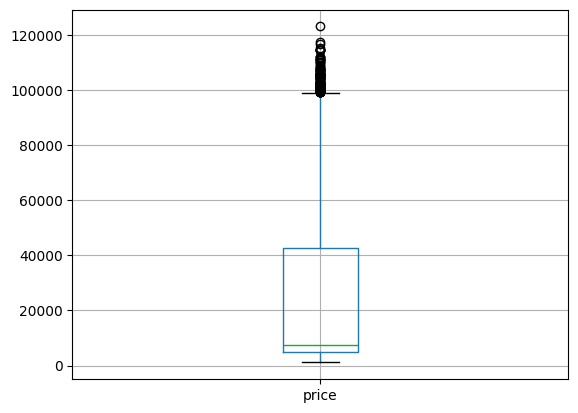

In [16]:
print(df['price'].describe())
df.boxplot(column=['price'])
plt.show()

In [17]:
import pandas as pd

# Example: outliers in "price"
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Outlier rows:")
print(outliers)


Lower bound: -51824.0
Upper bound: 99128.0
Outlier rows:
        airline source_city departure_time  stops arrival_time  \
215858  Vistara       Delhi        Evening      2      Evening   
215859  Vistara       Delhi        Evening      2      Evening   
216025  Vistara       Delhi        Evening      2      Morning   
216094  Vistara       Delhi        Morning      1      Evening   
216095  Vistara       Delhi        Morning      1      Evening   
...         ...         ...            ...    ...          ...   
293474  Vistara     Chennai        Morning      1        Night   
296001  Vistara     Chennai          Night      1      Morning   
296081  Vistara     Chennai  Early_Morning      1        Night   
296170  Vistara     Chennai          Night      1      Morning   
296404  Vistara     Chennai          Night      1      Evening   

       destination_city     class  duration  days_left   price  
215858          Kolkata  Business     21.08          1  114434  
215859          Kolk

In [18]:
group = df.groupby(['class'])["price"].describe()
group    ## no outliers  genuine data so to make it normal we will transform the data by using log transformation bcz-
        #Log transform compresses large values → extreme prices (like 1,20,000) don’t dominate.
        #Distribution becomes closer to normal, which helps many statistical tests & ML models (like linear regression).

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Business,93487.0,52540.081124,12969.314606,12000.0,45185.0,53164.0,60396.0,123071.0
Economy,206666.0,6572.342383,3743.519517,1105.0,4173.0,5772.0,7746.0,42349.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 22.9+ MB


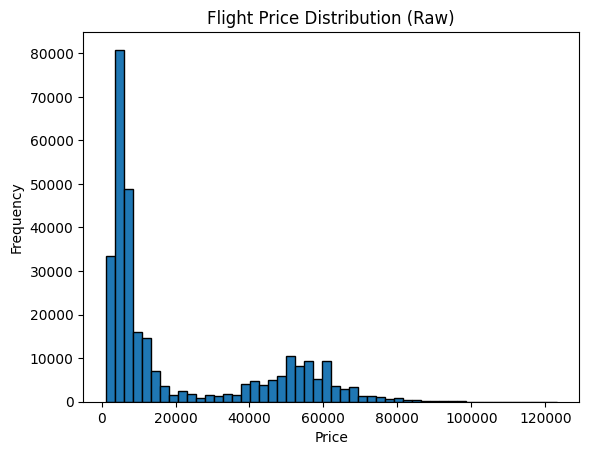

In [20]:
import matplotlib.pyplot as plt

# Histogram of raw prices
plt.hist(df['price'], bins=50,edgecolor = "black")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Flight Price Distribution (Raw)')
plt.show()  ## Right skewed data


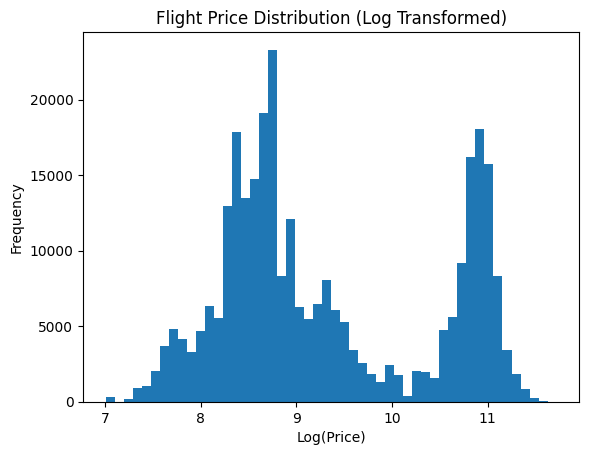

In [21]:
import numpy as np

# Create a new column
df['price_log'] = np.log1p(df['price'])   # log(1 + x), safer for 0 values

# Histogram of log-transformed prices
plt.hist(df['price_log'], bins=50)
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Flight Price Distribution (Log Transformed)')
plt.show()


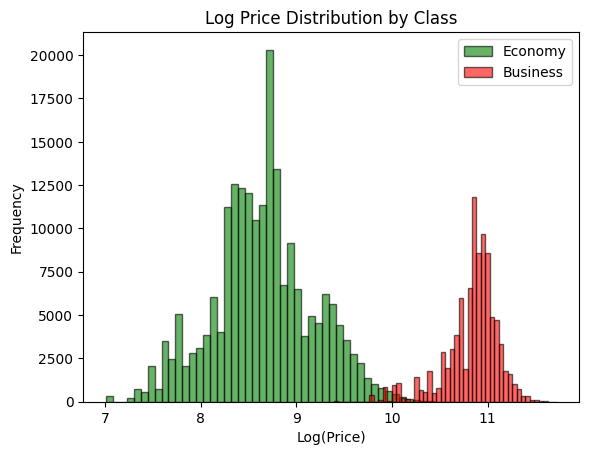

In [22]:


# Create masks for each class
eco = df[df['class'] == 'Economy']['price_log']
bus = df[df['class'] == 'Business']['price_log']

# Plot histograms
plt.hist(eco, bins=50, alpha=0.6, label='Economy', edgecolor='black',color= "green")
plt.hist(bus, bins=50, alpha=0.6, label='Business', edgecolor='black' ,color ="red")

# Labels
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.title("Log Price Distribution by Class")
plt.legend()
plt.show()


In [23]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import seaborn as sns


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
 10  price_log         300153 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 25.2+ MB
None

--- Summary Stats ---
        airline source_city departure_time          stops arrival_time  \
count    300153      300153         300153  300153.000000       300153   
uniq

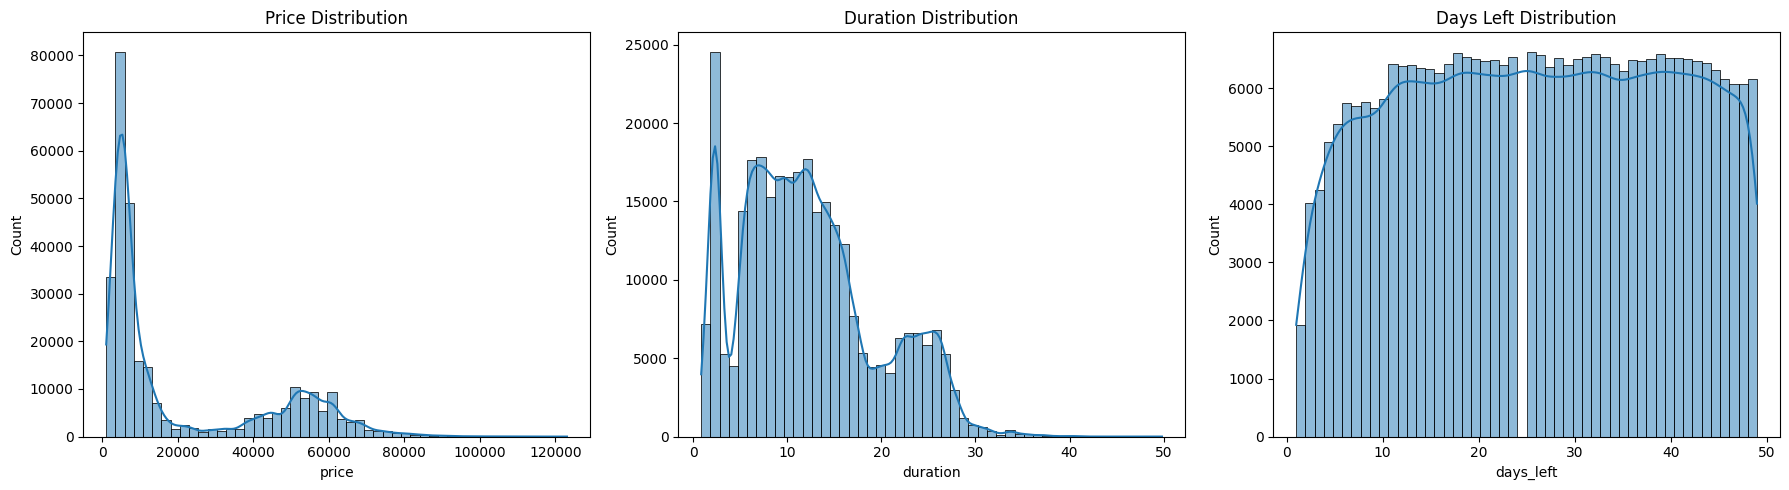

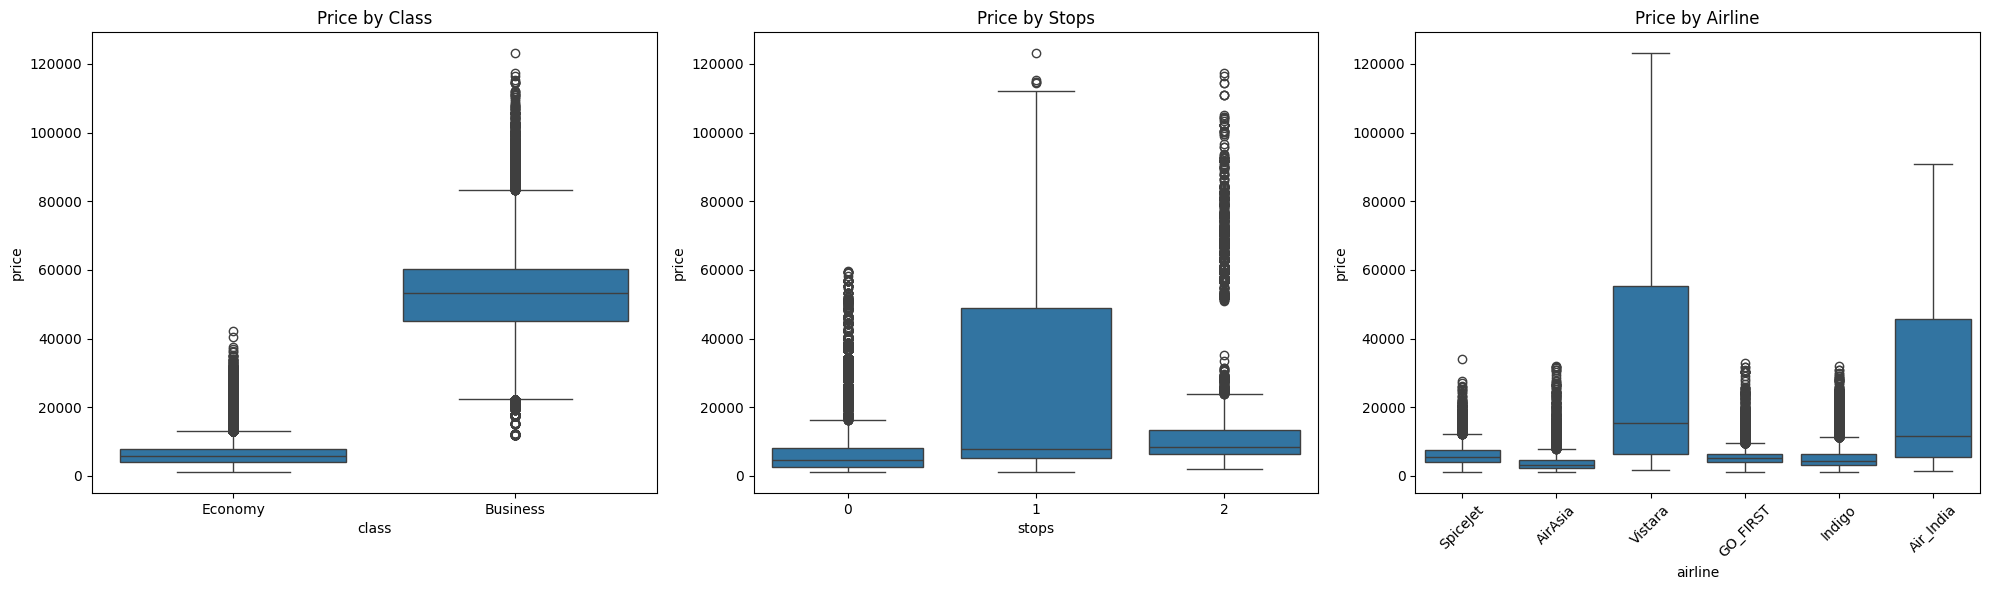

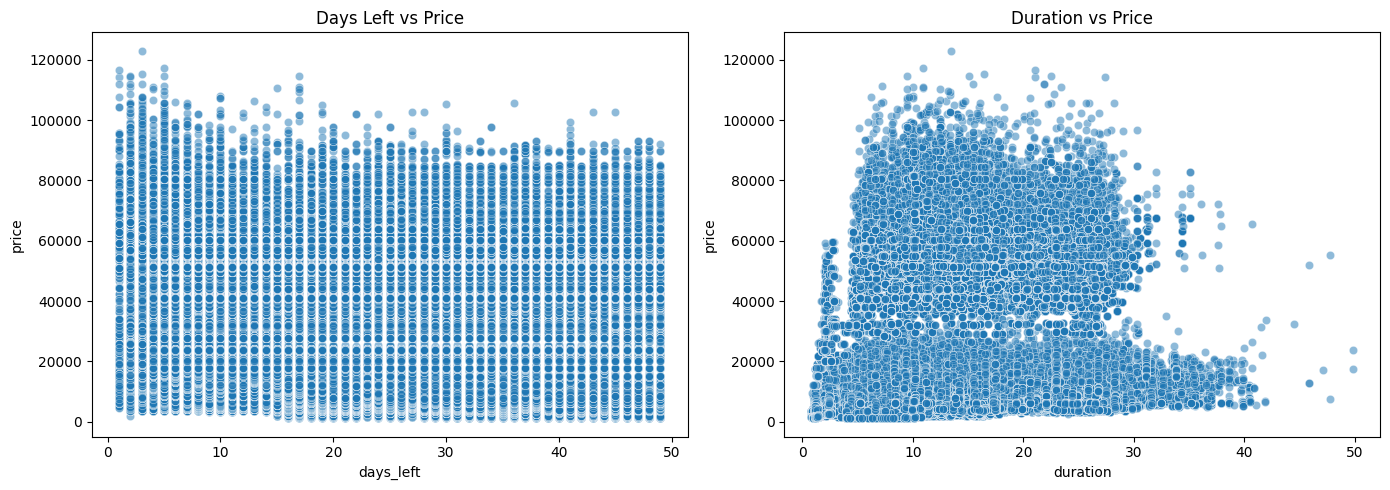


--- Economy vs Business Prices ---
Average Economy Price  : nan
Average Business Price : nan
Difference             : nan

--- Mean Prices by Class ---
class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

--- Mean Prices by Stops ---
stops
0     9375.938535
1    22900.992482
2    14113.450775
Name: price, dtype: float64

--- Mean Prices by Airline ---
airline
AirAsia       4091.072742
Indigo        5324.216303
GO_FIRST      5652.007595
SpiceJet      6179.278881
Air_India    23507.019112
Vistara      30396.536302
Name: price, dtype: float64


In [35]:
#1. BASIC INFO 
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Summary Stats ---")
print(df.describe(include='all'))

# 2. DISTRIBUTIONS 
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(df['price'], bins=50, kde=True, edgecolor="black", ax=axes[0])
axes[0].set_title("Price Distribution")

sns.histplot(df['duration'], bins=50, kde=True, edgecolor="black", ax=axes[1])
axes[1].set_title("Duration Distribution")

sns.histplot(df['days_left'], bins=50, kde=True, edgecolor="black", ax=axes[2])
axes[2].set_title("Days Left Distribution")

plt.tight_layout()
plt.show()


#3. CATEGORICAL vs PRICE 
fig, axes = plt.subplots(1, 3, figsize=(20,6))

sns.boxplot(x='class', y='price', data=df, ax=axes[0])
axes[0].set_title("Price by Class")

sns.boxplot(x='stops', y='price', data=df, ax=axes[1])
axes[1].set_title("Price by Stops")

sns.boxplot(x='airline', y='price', data=df, ax=axes[2])
axes[2].set_title("Price by Airline")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 4. NUMERIC RELATIONSHIPS 
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.scatterplot(x='days_left', y='price', data=df, alpha=0.5, ax=axes[0])
axes[0].set_title("Days Left vs Price")

sns.scatterplot(x='duration', y='price', data=df, alpha=0.5, ax=axes[1])
axes[1].set_title("Duration vs Price")

plt.tight_layout()
plt.show()


# Economy vs Business price difference
eco_mean = df[df['class']==0]['price'].mean()
bus_mean = df[df['class']==1]['price'].mean()

print("\n--- Economy vs Business Prices ---")
print(f"Average Economy Price  : {eco_mean:.2f}")
print(f"Average Business Price : {bus_mean:.2f}")
print(f"Difference             : {bus_mean - eco_mean:.2f}")

# Groupby Summaries
print("\n--- Mean Prices by Class ---")
print(df.groupby('class')['price'].mean())

print("\n--- Mean Prices by Stops ---")
print(df.groupby('stops')['price'].mean())

print("\n--- Mean Prices by Airline ---")
print(df.groupby('airline')['price'].mean().sort_values())



In [32]:
# Economy vs Business price difference
eco_mean = df[df['class']==0]['price'].mean()
bus_mean = df[df['class']==1]['price'].mean()

print("\n--- Economy vs Business Prices ---")
print(f"Average Economy Price  : {eco_mean:.2f}")
print(f"Average Business Price : {bus_mean:.2f}")
print(f"Difference             : {bus_mean - eco_mean:.2f}")

# Groupby Summaries
print("\n--- Mean Prices by Class ---")
print(df.groupby('class')['price'].mean())

print("\n--- Mean Prices by Stops ---")
print(df.groupby('stops')['price'].mean())

print("\n--- Mean Prices by Airline ---")
print(df.groupby('airline')['price'].mean().sort_values())



--- Economy vs Business Prices ---
Average Economy Price  : nan
Average Business Price : nan
Difference             : nan

--- Mean Prices by Class ---
class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

--- Mean Prices by Stops ---
stops
0     9375.938535
1    22900.992482
2    14113.450775
Name: price, dtype: float64

--- Mean Prices by Airline ---
airline
AirAsia       4091.072742
Indigo        5324.216303
GO_FIRST      5652.007595
SpiceJet      6179.278881
Air_India    23507.019112
Vistara      30396.536302
Name: price, dtype: float64


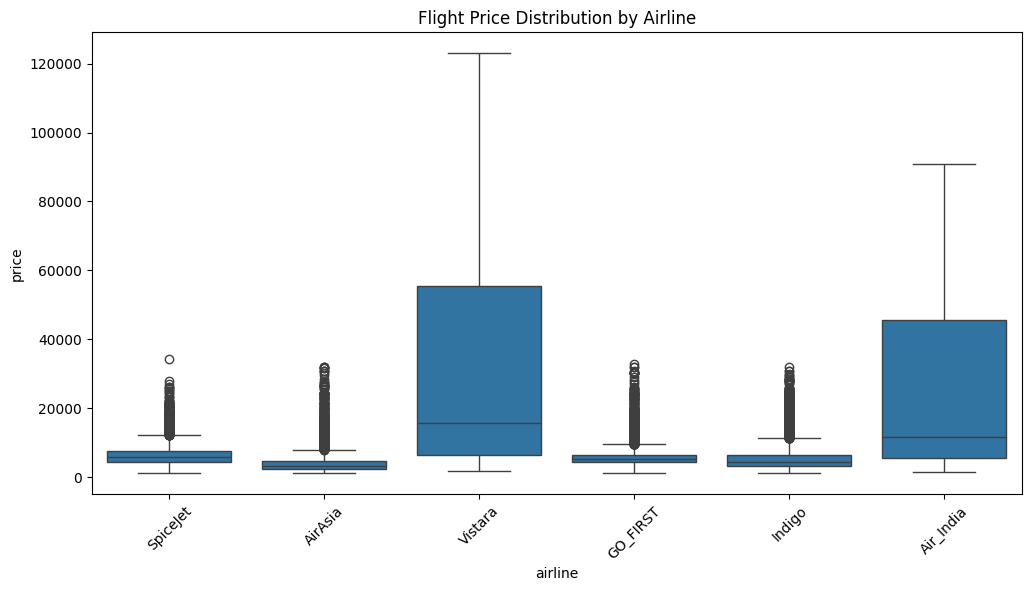

In [31]:
## Flight price V/S Airline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='airline', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Flight Price Distribution by Airline")
plt.show()


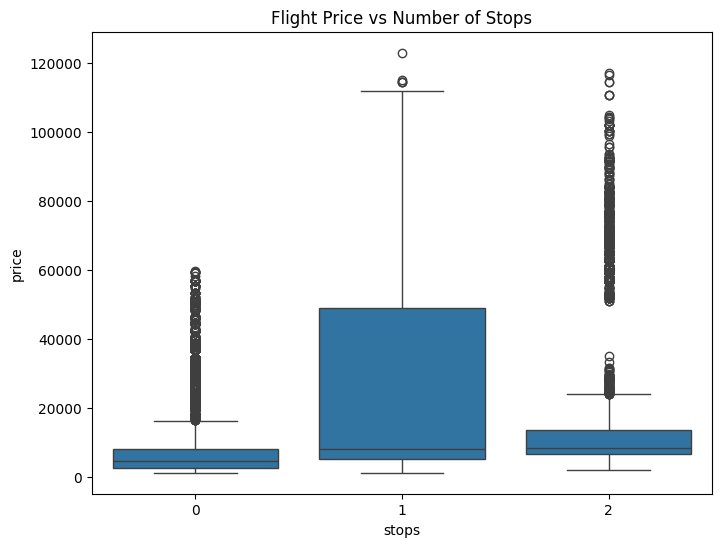

In [26]:
## Flight price V/S Stops
plt.figure(figsize=(8,6))
sns.boxplot(x='stops', y='price', data=df)
plt.title("Flight Price vs Number of Stops")
plt.show()


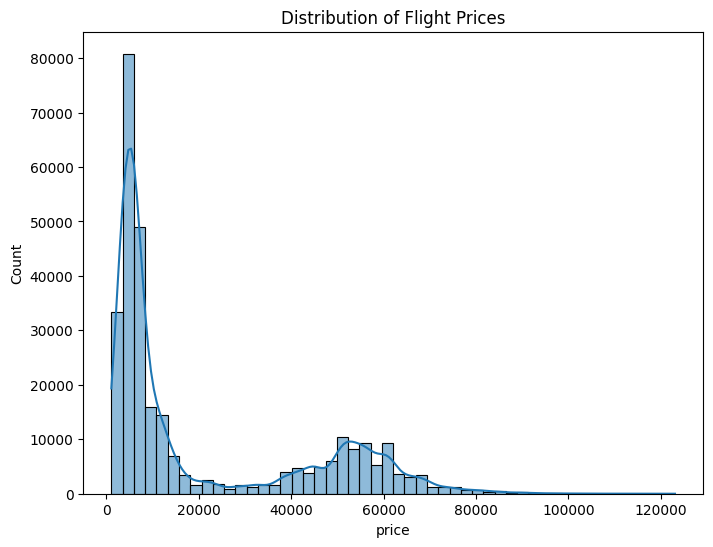

In [27]:
## Histogram of prices
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Flight Prices")
plt.show()


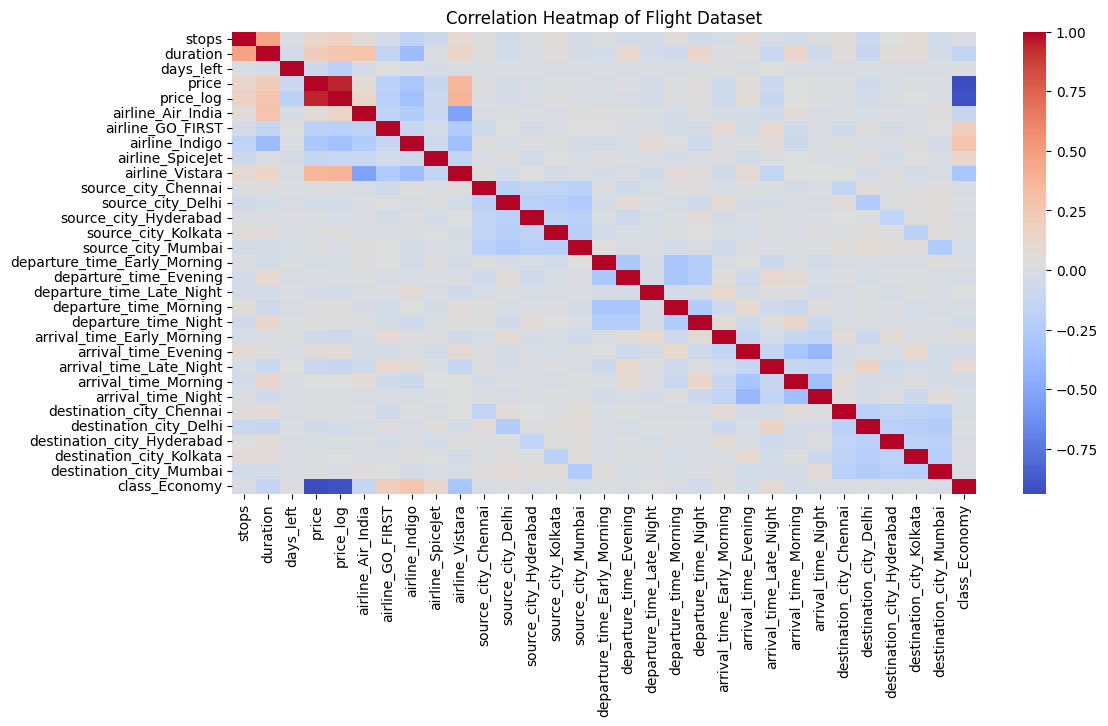

In [30]:
# Encode categorical variables
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# Correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Flight Dataset")
plt.show()


In [29]:
df_encoded.corr()['price'].sort_values(ascending=False)


price                           1.000000
price_log                       0.946210
airline_Vistara                 0.360816
duration                        0.204222
stops                           0.119648
airline_Air_India               0.070041
arrival_time_Evening            0.056408
departure_time_Night            0.041768
arrival_time_Morning            0.030379
destination_city_Kolkata        0.020956
arrival_time_Night              0.020344
source_city_Chennai             0.018742
destination_city_Chennai        0.018473
departure_time_Morning          0.018199
source_city_Kolkata             0.016127
source_city_Mumbai              0.013206
destination_city_Mumbai         0.010533
departure_time_Evening          0.007946
destination_city_Hyderabad     -0.008292
departure_time_Early_Morning   -0.012232
source_city_Hyderabad          -0.012828
departure_time_Late_Night      -0.033768
source_city_Delhi              -0.043282
destination_city_Delhi         -0.052527
arrival_time_Ear